In [1]:
# Written by: Parsa Toopchinezhad
# Date: 2025-02-12
# Description: This script loads the Puffer dataset, performs basic data analysis, visualizes key metrics, and trains basic tree-based models on it


# Step 0: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from numpy.lib.stride_tricks import sliding_window_view
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1: Load the dataset 
# Will check if the dataset is already downloaded, if not, download it.
# As we disscussed, the entire dataset is huge. For now, we will work the data of only one day. However, we can add more data later.
try:
    df = pd.read_csv("2025-02-10T11_2025-02-11T11_video_sent_2025-02-10T11_2025-02-11T11.csv")
except FileNotFoundError:
    response = requests.get("https://storage.googleapis.com/puffer-data-release/2025-02-10T11_2025-02-11T11/video_sent_2025-02-10T11_2025-02-11T11.csv")
    with open("2025-02-10T11_2025-02-11T11_video_sent_2025-02-10T11_2025-02-11T11.csv", 'wb') as f:
        f.write(response.content)
    df = pd.read_csv("2025-02-10T11_2025-02-11T11_video_sent_2025-02-10T11_2025-02-11T11.csv")

In [3]:
# Step 2: Basic dataset information
print(df.info())
print(df.describe())
print(df.columns)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5793735 entries, 0 to 5793734
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time (ns GMT)  int64  
 1   session_id     object 
 2   index          int64  
 3   expt_id        int64  
 4   channel        object 
 5   video_ts       int64  
 6   format         object 
 7   size           int64  
 8   ssim_index     float64
 9   cwnd           int64  
 10  in_flight      int64  
 11  min_rtt        int64  
 12  rtt            int64  
 13  delivery_rate  int64  
 14  buffer         float64
 15  cum_rebuf      float64
dtypes: float64(3), int64(10), object(3)
memory usage: 707.2+ MB
None
       time (ns GMT)         index       expt_id      video_ts          size  \
count   5.793735e+06  5.793735e+06  5.793735e+06  5.793735e+06  5.793735e+06   
mean    1.739232e+18  1.053840e+01  2.219382e+03  2.184913e+11  8.252388e+05   
std     2.155462e+13  3.207779e+01  2.270850e+00  8.601809e+10  5.567191e

,time (ns GMT),session_id,index,expt_id,channel,video_ts,format,size,ssim_index,cwnd,in_flight,min_rtt,rtt,delivery_rate,buffer,cum_rebuf
0,1739185200869000000,iZW30+Ejts3y0xjhGIplrXw5gBWpF99Liqgt9f6aWS0=,0,2216,abc,316896800220,1280x720-20,491829,0.987401,1252,0,71970,80444,11112870,14.098,0.233
1,1739185202895000000,iZW30+Ejts3y0xjhGIplrXw5gBWpF99Liqgt9f6aWS0=,0,2216,abc,316896980400,1280x720-20,1195444,0.978389,1338,0,71970,82420,11112870,14.056,0.233
2,1739185204899000000,iZW30+Ejts3y0xjhGIplrXw5gBWpF99Liqgt9f6aWS0=,0,2216,abc,316897160580,1280x720-20,1026261,0.981215,1392,0,71970,79092,11916032,14.052,0.233
3,1739185206934000000,iZW30+Ejts3y0xjhGIplrXw5gBWpF99Liqgt9f6aWS0=,0,2216,abc,316897340760,1280x720-20,850724,0.984729,1392,0,71970,81888,11426039,14.056,0.233
4,1739185208034000000,iZW30+Ejts3y0xjhGIplrXw5gBWpF99Liqgt9f6aWS0=,0,2216,abc,316897520940,1280x720-20,717125,0.985760,1390,0,71970,81591,11426039,14.918,0.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793730,1739251747031000000,nGCxg0ZXk0Vug2Qj0BAymEvHwdUTdfQrrXCF+zpD3yw=,4,2223,pbs,157428311040,1280x720-24,127545,0.987297,410,0,26203,67207,5476171,5.971,0.162
5793731,1739251747131000000,nGCxg0ZXk0Vug2Qj0BAymEvHwdUTdfQrrXCF+zpD3yw=,4,2223,pbs,157428491220,1280x720-22,199016,0.989295,410,0,26203,64762,5476171,7.896,0.162
5793732,1739251747196000000,nGCxg0ZXk0Vug2Qj0BAymEvHwdUTdfQrrXCF+zpD3yw=,4,2223,pbs,157428671400,1280x720-20,308143,0.990159,410,0,26203,45187,5476171,9.812,0.162
5793733,1739251747275000000,nGCxg0ZXk0Vug2Qj0BAymEvHwdUTdfQrrXCF+zpD3yw=,4,2223,pbs,157428851580,1920x1080-24,351156,0.991965,412,0,26203,41021,5476171,11.740,0.162


In [4]:
# Step 3: Remove unnecessary columns & rename columns
#df = df.drop(columns=['session_id', 'channel', 'format'])
df = df.rename(columns={'time (ns GMT)': 'time'})
# make time relative to start of session and convert to seconds
df['time'] = (df['time'] - df['time'].min()) / 1e9
# IMPORTANT: The dataset consists of multiple sessions. Each session is identified by a unique session_id. We need to take this into account when analyzing the data or training models.
# group by session_id
groups = df.groupby('session_id')

In [5]:
# This iis how the dataset should be structured, a collection of rows for each session. This is crucial to understand.
for g in groups:
    print(g)
    break # print only the first group

('+/61XIgXZ6zuPhGuRC/UsoIfVTLbBRkXlpCxXjzP3vw=',               time                                    session_id  index  \
5162539  45209.158  +/61XIgXZ6zuPhGuRC/UsoIfVTLbBRkXlpCxXjzP3vw=      0   
5162540  45209.431  +/61XIgXZ6zuPhGuRC/UsoIfVTLbBRkXlpCxXjzP3vw=      0   
5162541  45209.638  +/61XIgXZ6zuPhGuRC/UsoIfVTLbBRkXlpCxXjzP3vw=      0   
5162542  45209.795  +/61XIgXZ6zuPhGuRC/UsoIfVTLbBRkXlpCxXjzP3vw=      0   
5162543  45210.024  +/61XIgXZ6zuPhGuRC/UsoIfVTLbBRkXlpCxXjzP3vw=      0   
5162544  45210.298  +/61XIgXZ6zuPhGuRC/UsoIfVTLbBRkXlpCxXjzP3vw=      0   

         expt_id channel      video_ts       format     size  ssim_index  \
5162539     2223     abc  320964183540   426x240-26    48551    0.911100   
5162540     2223     abc  320964363720   426x240-26    33329    0.922288   
5162541     2223     abc  320964543900   854x480-26    66797    0.963648   
5162542     2223     abc  320964724080  1280x720-26   113468    0.975876   
5162543     2223     abc  320964904260  1280x

In [6]:
# This function plots the various metrics of a given session
def plot_session(df, session_id):
    session_df = df[df['session_id'] == session_id].sort_values('time')
    metrics = [
        'cwnd', 'in_flight', 'min_rtt', 'rtt',
        'delivery_rate', 'buffer', 'cum_rebuf',
        'size', 'ssim_index'
    ]
    ylabel_map = {
        'cwnd': 'Congestion Window (packets)',
        'in_flight': 'In-flight Packets',
        'min_rtt': 'Min RTT (µs)',
        'rtt': 'RTT (µs)',
        'delivery_rate': 'Delivery Rate (B/s)',
        'buffer': 'Playback Buffer (s)',
        'cum_rebuf': 'Cumulative Rebuffer (s)',
        'size': 'Chunk Size (bytes)',
        'ssim_index': 'SSIM (0–1)'
    }

    for metric in metrics:
        if metric not in session_df.columns:
            continue

        plt.figure(figsize=(10, 4))
        plt.plot(session_df['time'], session_df[metric], linewidth=1.25)
        plt.xlabel('Time (s since session start)')
        plt.ylabel(ylabel_map.get(metric, metric))
        plt.title(f'{metric} over Time — Session: {session_id}')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.ticklabel_format(style='plain', useOffset=False, axis='x')
        plt.ticklabel_format(style='plain', useOffset=False, axis='y')
        plt.tight_layout()
        plt.show()


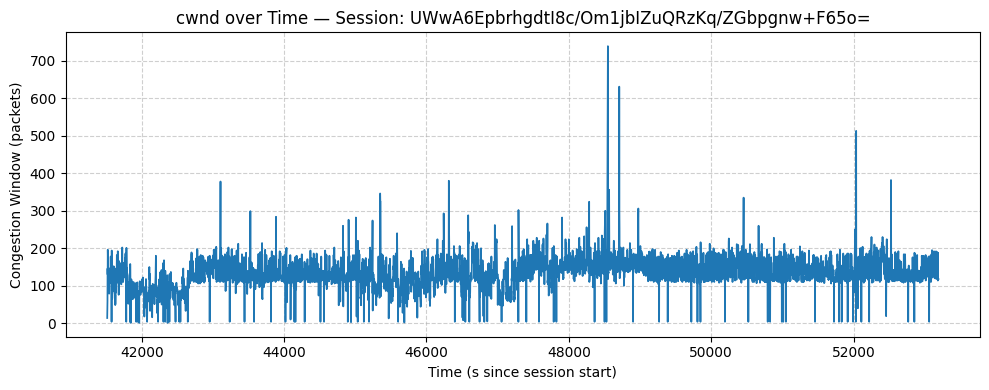

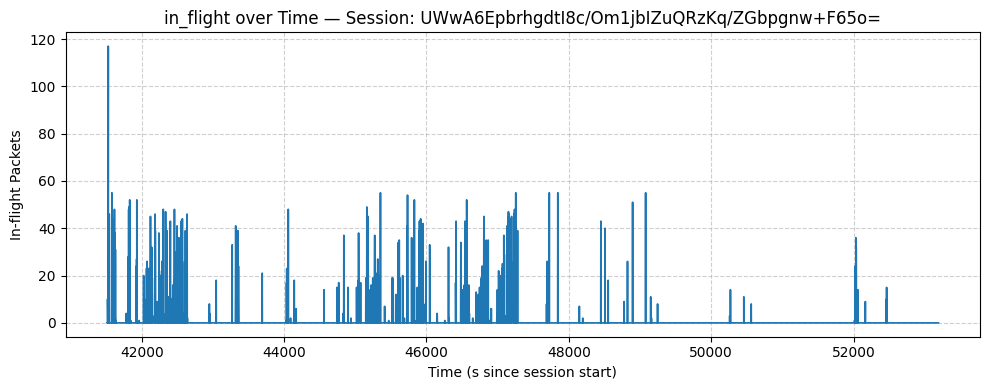

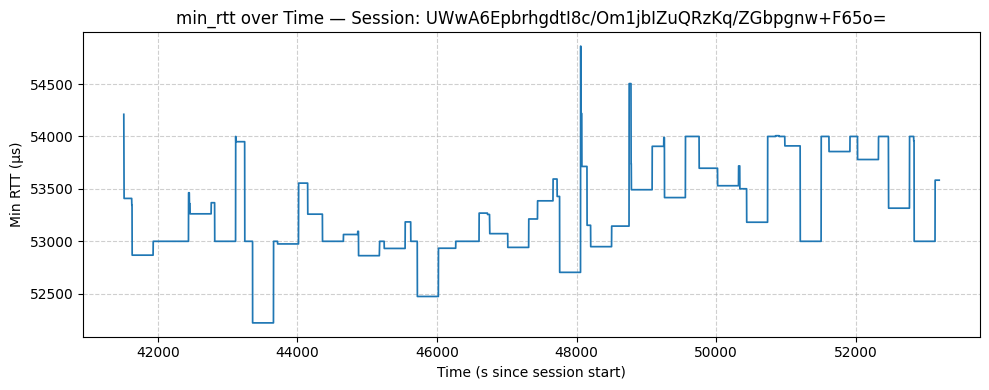

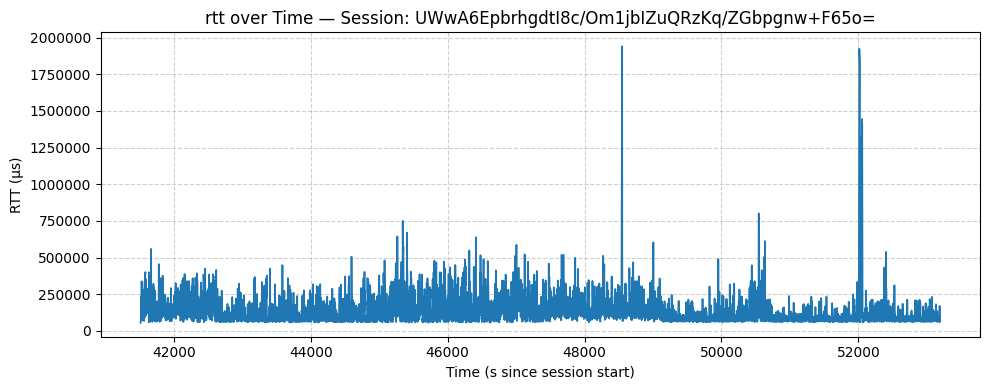

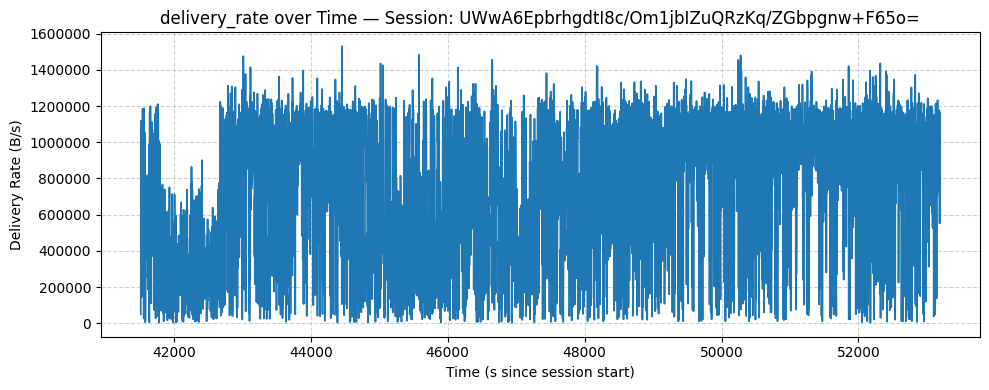

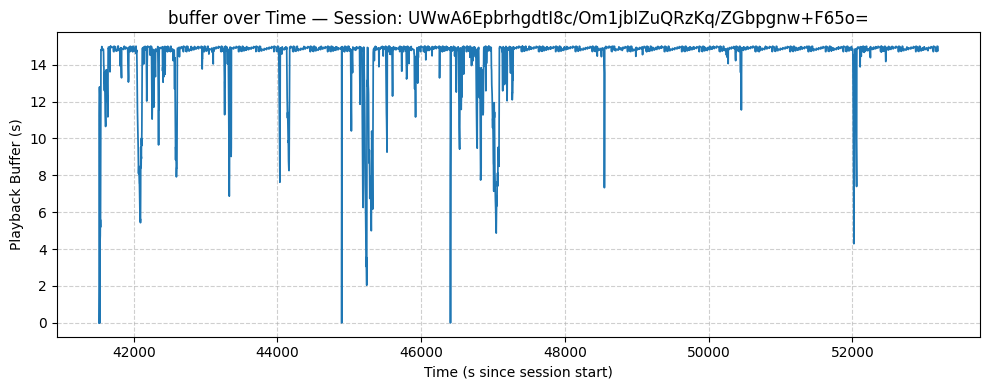

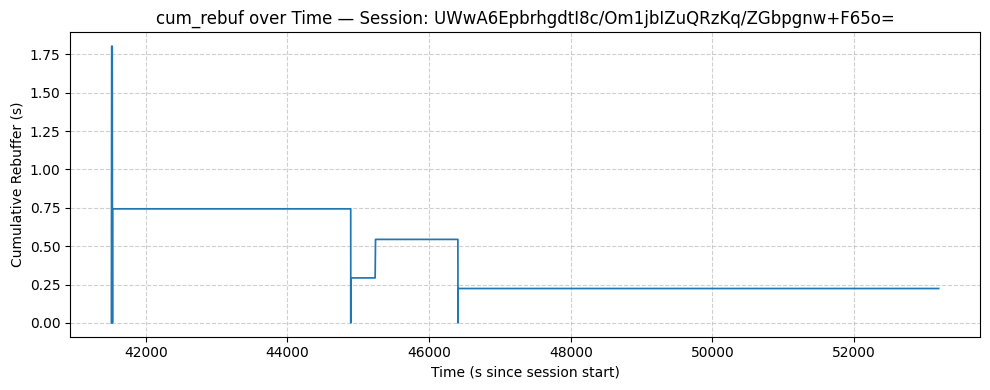

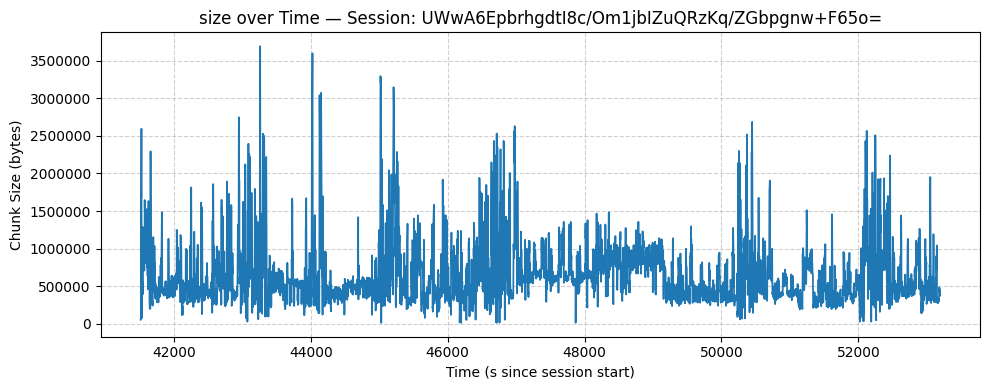

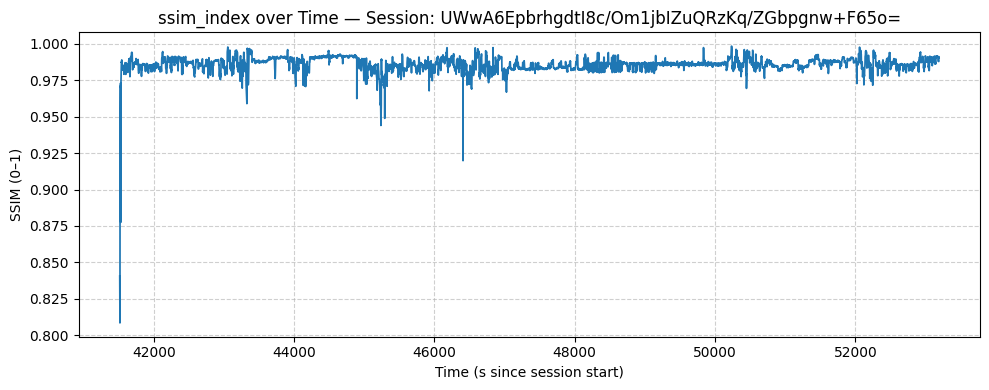

In [7]:
# Lets see what session #10 looks like
plot_session(df, df['session_id'].unique()[10])

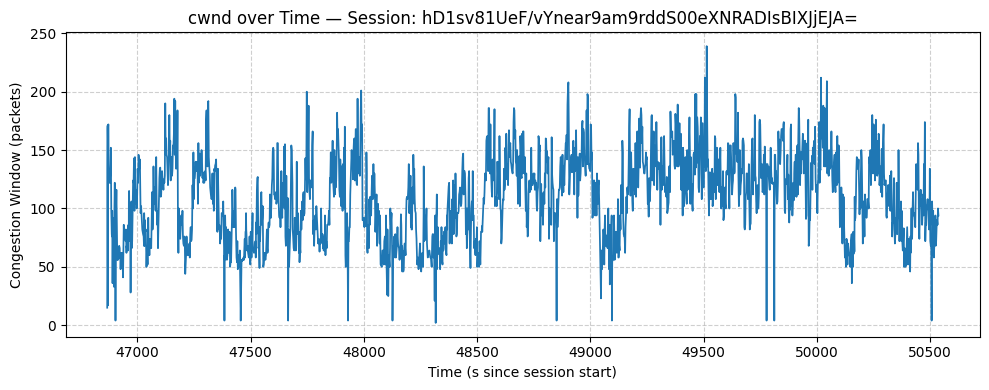

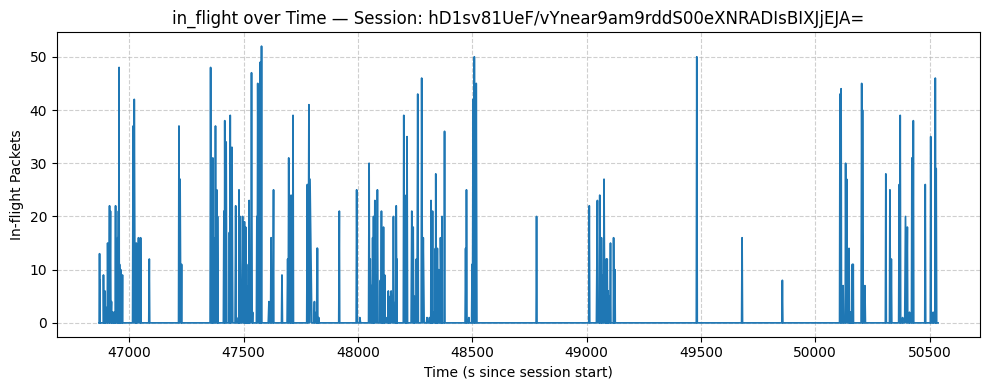

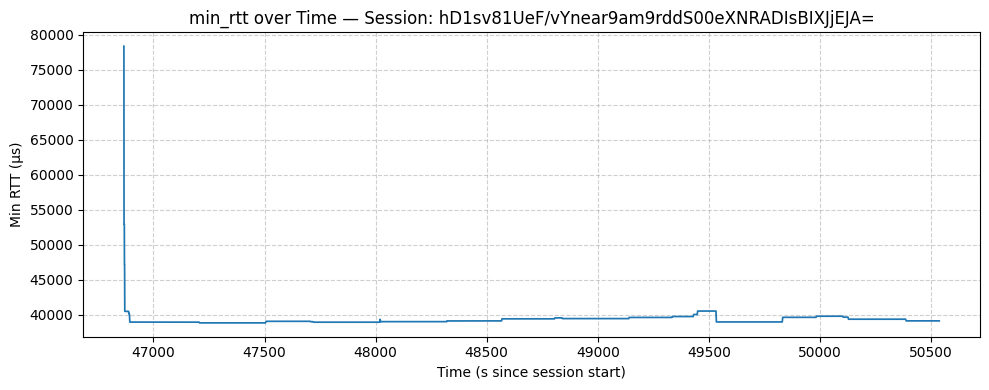

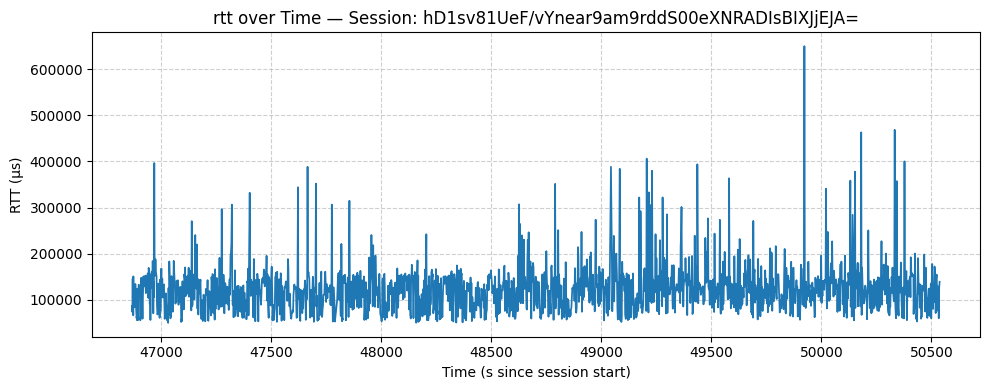

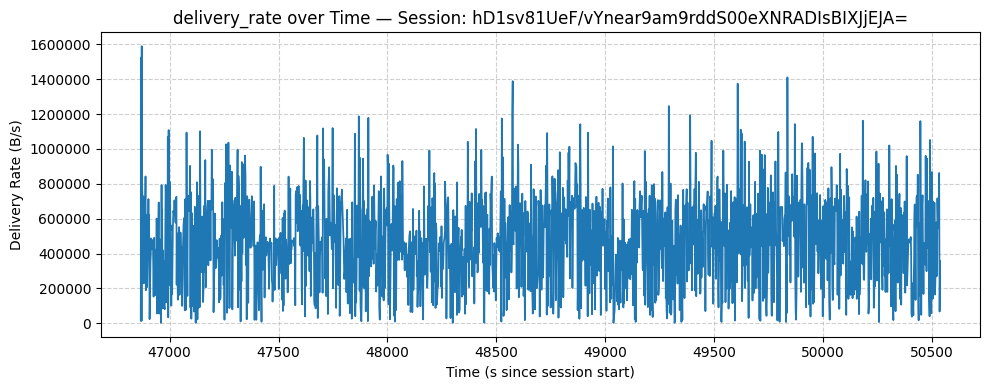

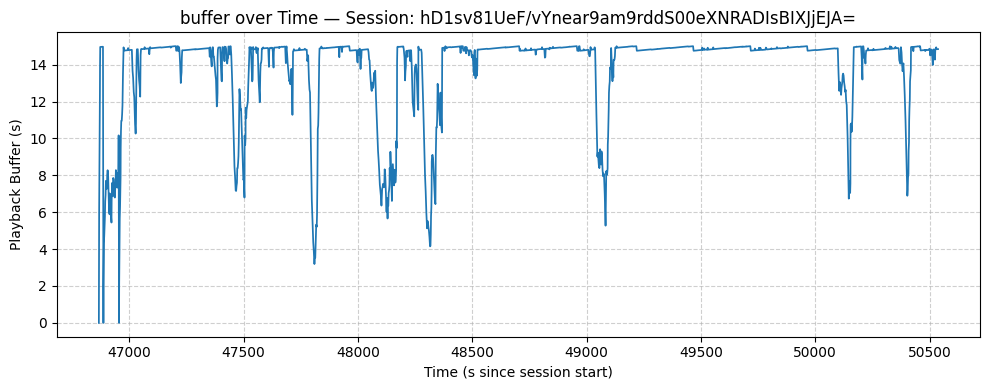

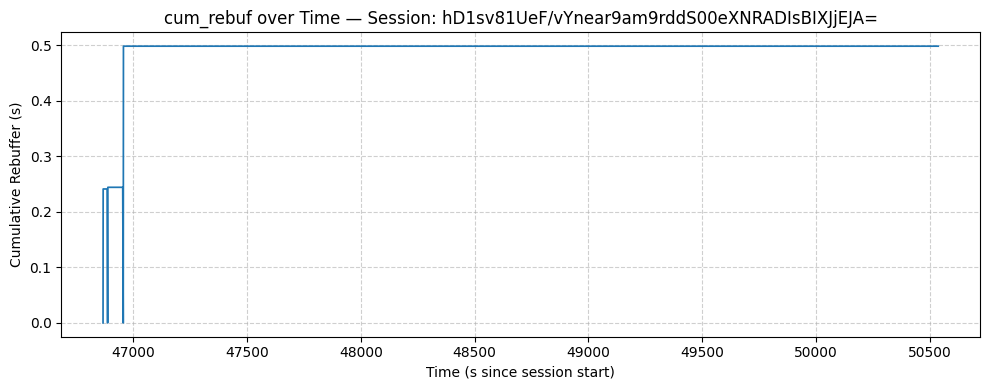

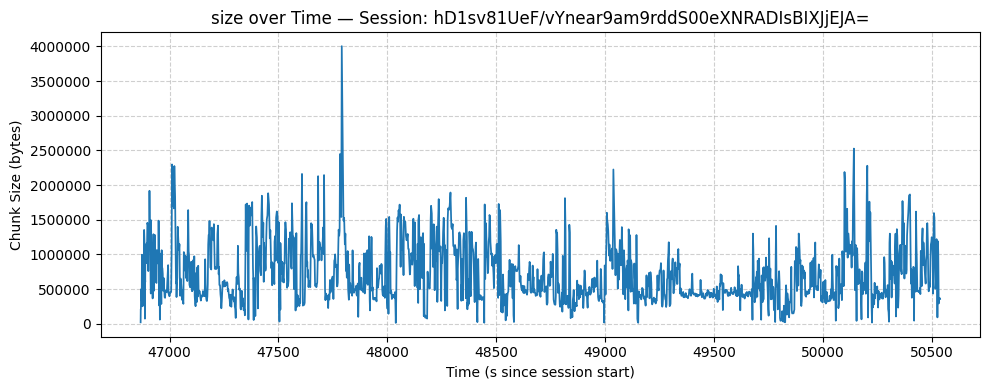

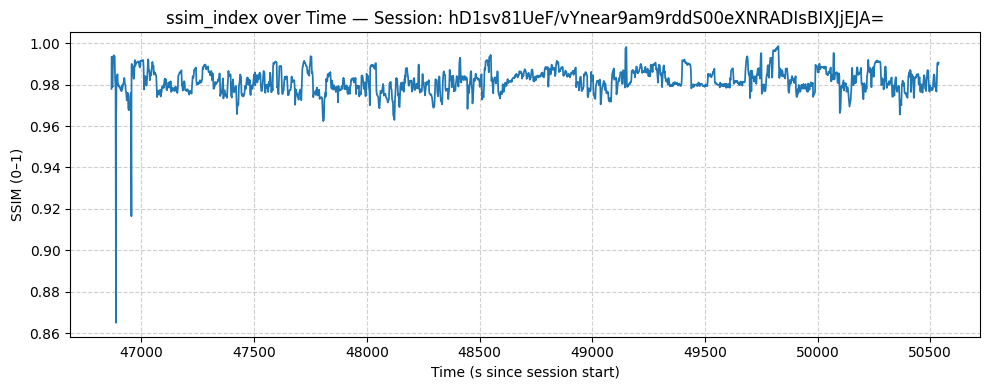

In [8]:
# Lets see what session #13 looks like. Note that they look quite different to session #10
plot_session(df, df['session_id'].unique()[13])

Preparing numeric dataset.
Adding lag features (per session, 1 lags)...


100%|██████████| 3595/3595 [00:10<00:00, 342.65it/s]


Dataset ready: 500,000 rows, 19 columns
🚀 Training XGBoost model...
XGBoost training complete.

📊 XGBoost Model Performance
    Mean Absolute Error: 16246.67
    R² Score: 0.581


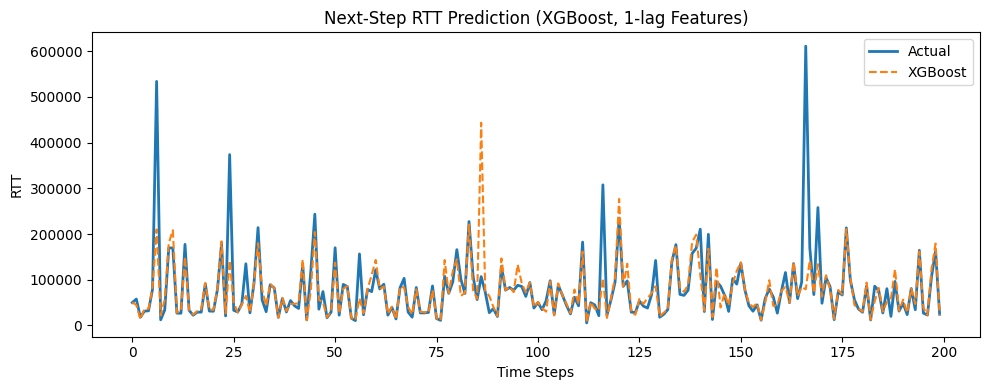

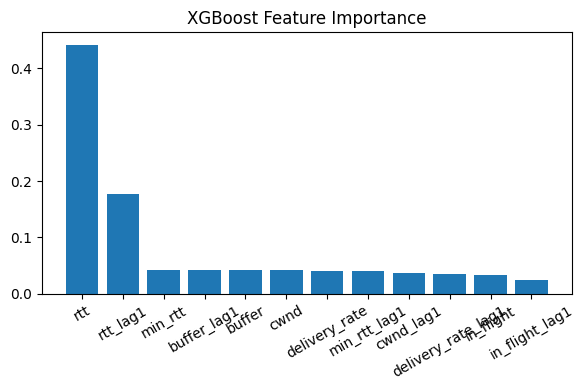

In [9]:
# Step 4: Train a Basic XGBoost model for RTT prediction
# I chose XGBoost because it is a powerful, tree-based model. We can consider this as our baseline. We should try to beat it.

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

print("Preparing numeric dataset.")

# Keep only numeric columns (make sure session_id and time are still accessible)
df_numeric = df.select_dtypes(include=[np.number]).copy()
if 'session_id' in df.columns:
    df_numeric['session_id'] = df['session_id']
if 'time' in df.columns:
    df_numeric['time'] = df['time']

# Columns of interest (these are the most important and relevant columns, I recommend you also start from these)
feature_cols = ['cwnd', 'in_flight', 'min_rtt', 'rtt', 'delivery_rate', 'buffer']
feature_cols = [c for c in feature_cols if c in df_numeric.columns]

# Since this is a time-series problem, feeding the previous rows into the model will help us predict the future better
# Here, I am just feeding 1 previous layer (lag) to the model, increasing this should in theory help, although too much data can send the model off track
n_lags = 1

# IMPORTANT: As I said, it is better to think of puffer as a dataset consisting of smaller datasets, each of which corresponds to a specific session, therefore, when making our lagged features, we have to be careful to treat the different sessions as distinctly.
dfs = []
print(f"Adding lag features (per session, {n_lags} lags)...")
for sid, group in tqdm(df_numeric.groupby('session_id'), total=df_numeric['session_id'].nunique()):
    g = group.sort_values('time').copy()
    for lag in range(1, n_lags + 1):
        for col in feature_cols:
            g[f"{col}_lag{lag}"] = g[col].shift(lag)
    dfs.append(g)

df_model = pd.concat(dfs, axis=0).dropna().reset_index(drop=True)

# Here, I am predicting the rtt of the next step. We are also looking to train models to predict other metrics (e.g., delivery_rate, cwnd, buffer)
# In addition, we also want to train models to predict rtt at different values in the future, such as 3 steps, 5 steps, 10 steps, etc
df_model['rtt_next'] = df_model['rtt'].shift(-1)
df_model = df_model.dropna(subset=['rtt_next']).reset_index(drop=True)

# Drop session_id/time from training
if 'session_id' in df_model.columns:
    df_model = df_model.drop(columns=['session_id'])
if 'time' in df_model.columns:
    df_model = df_model.drop(columns=['time'])

# Optional: subsample for faster training
# The whole dataset has a few million rows, here I am just training the model on a subset of the data (first 500000 rows). This is mostly so the training won't take too long, but definitely feel free to add more data (especially for LSTM, etc)
sample_size = 500000
if len(df_model) > sample_size:
    df_model = df_model.sample(n=sample_size, random_state=42)
    df_model = df_model.reset_index(drop=True)

print(f"Dataset ready: {df_model.shape[0]:,} rows, {df_model.shape[1]} columns")


# Update feature columns with lags
feature_cols = [c for c in df_model.columns if c.startswith(tuple(['cwnd', 'in_flight', 'min_rtt', 'rtt', 'delivery_rate', 'buffer'])) and not c.endswith('_next')]
# Create test and train data (we set shuffle to be false for reproducibility)
X = df_model[feature_cols]
y = df_model['rtt_next']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False # preserve temporal order
)

print("🚀 Training XGBoost model...")

# Create and train the model (these are just standard hyperparameter settings, we could do a bit of fine-tuning later)
xgb_model = XGBRegressor(
    n_estimators=300,        # number of trees
    learning_rate=0.05,      # step size shrinkage
    max_depth=8,             # tree depth
    subsample=0.8,           # use 80% of data per tree
    colsample_bytree=0.8,    # use 80% of features per tree
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror', # regression objective
    eval_metric='mae',
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print("XGBoost training complete.")

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate (the main thing we are looking for is the r2 score, a number between 0 and 1, the larger the better)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n📊 XGBoost Model Performance")
print(f"    Mean Absolute Error: {mae_xgb:.2f}")
print(f"    R² Score: {r2_xgb:.3f}")

# Plot predictions vs actual values (we will plot only the first 200 rows)
plt.figure(figsize=(10,4))
plt.plot(y_test.values[:200], label='Actual', linewidth=2)
plt.plot(y_pred_xgb[:200], label='XGBoost', linestyle='--')
plt.title(f'Next-Step RTT Prediction (XGBoost, {n_lags}-lag Features)')
plt.xlabel('Time Steps')
plt.ylabel('RTT')
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance plot (these are the most important features the tree-model used to train on)
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,4))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(X.columns)[indices], rotation=30)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [10]:
# Ok, so the R² Score is around ~0.60. Not bad (RTT is always a hard metric to predict), but definitely has room to improve. Here are some ideas on what we can do from here:
# 1) Use better models like LSTM, GRU, etc.
# 2) Parameter-tuning
# 3) Using a larger subset of the data
# 4) Feature engineering
# 5) Smoothing the dataset before giving it to the model
# 6) Feeding more lagged data to the model
# And many more things...

# PCA Idea

# LSTM

In [90]:
import torch
import torch.nn as nn
import random
from torch.utils.data import Dataset, DataLoader, TensorDataset

SEQ_LEN = 30        # length of input sequence (timesteps)
HIDDEN_DIM = 128
NUM_LAYERS = 3
BATCH_SIZE = 128
LR = 1e-3
EPOCHS = 20
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42

torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [91]:
print("Preparing numeric dataset.")

# Keep only numeric columns (make sure session_id and time are still accessible)
df_numeric = df.select_dtypes(include=[np.number]).copy()
if 'session_id' in df.columns:
    df_numeric['session_id'] = df['session_id']
if 'time' in df.columns:
    df_numeric['time'] = df['time']

# Columns of interest (these are the most important and relevant columns, I recommend you also start from these)
feature_cols = ['cwnd', 'in_flight', 'min_rtt', 'rtt', 'delivery_rate', 'buffer']
feature_cols = [c for c in feature_cols if c in df_numeric.columns]

# Here, I am predicting the rtt of the next step. We are also looking to train models to predict other metrics (e.g., delivery_rate, cwnd, buffer)
# In addition, we also want to train models to predict rtt at different values in the future, such as 3 steps, 5 steps, 10 steps, etc
groups = df_numeric.groupby('session_id')


Preparing numeric dataset.


In [92]:
def form_sliding_windows(groups:pd.DataFrame, regression_target, regress_based_on, temporal_var, num_lag=1):
    X_windows = []
    y_windows = []

    for id, group in groups:
        g = group.sort_values(temporal_var).copy()
        if regress_based_on not in g.columns: continue
        g = g.reset_index(drop=True)
        g[regression_target] = g[regress_based_on].shift(-num_lag)
        g = g.dropna().reset_index(drop=True)
        
        if len(g) <= SEQ_LEN: continue  # If number of timesteps is less than window length, skip
        array = g[feature_cols]             #(B, feature_dim)
        targets = g[regression_target]      #(B, )

        windows = sliding_window_view(array.to_numpy(), window_shape=SEQ_LEN, axis=0)
        # Want (B, SEQ_LEN, feature_dim), but sliding_window_view returns (B, feature_dim, SEQ_LEN) for some reason
        if windows.shape[2] != array.shape[1]:
            windows = windows.transpose(0, 2, 1)

        y = targets.to_numpy()[SEQ_LEN-1:]
        X_windows.append(windows)
        y_windows.append(y)

    return np.concatenate(X_windows, axis=0), np.concatenate(y_windows, axis=0)


In [93]:
class LSTM_regressor(nn.Module):
    def __init__(self, in_d, hidden_d, out_d, num_layers, dropout, bidirectional=False):
        super().__init__()
        self.num_direction = 2 if bidirectional else 1
        self.in_dim = in_d
        self.out_dim = out_d
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size=self.in_dim, hidden_size=hidden_d, num_layers=self.num_layers, batch_first=True, dropout=dropout,
                            bidirectional=bidirectional)
        
        self.dense_out = nn.Linear(hidden_d * self.num_direction, self.out_dim)
        
    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)
        if self.num_direction == 2:
            last_hidden = torch.cat((h_n[-2], h_n[-1]), dim=1)
        else:
            last_hidden = h_n[-1]
        out = self.dense_out(last_hidden)
        return out

# 1-ahead predictor

In [94]:
X_windows, y_windows = form_sliding_windows(groups, regression_target='rtt_next', regress_based_on='rtt', temporal_var='time')

assert len(X_windows) == len(y_windows)
print(f"X_windows: num_windows = {X_windows.shape[0]}, window_length: {X_windows.shape[1]}, per_window_dim: {X_windows.shape[2]}")

# Could subsample here
m = 1000000
print(f"Training: num_windows = {m} with feature_dim = {X_windows.shape[2]}")
idx = np.random.choice(len(X_windows), size=m, replace=False)
X_train, X_val, y_train, y_val = train_test_split(X_windows[idx], y_windows[idx], test_size=0.2, shuffle=False, random_state=42)

# Preprocessing:
train_flat = X_train.reshape(-1, X_train.shape[-1])
scaler = StandardScaler().fit(train_flat)

# transform by reshaping, transforming, reshaping back
def scale_windows(X, scaler):
    orig_shape = X.shape
    flat = X.reshape(-1, orig_shape[-1])
    flat_t = scaler.transform(flat)
    return flat_t.reshape(orig_shape)

# Scale X (input windows)
X_train_scaled = scale_windows(X_train, scaler)
X_val_scaled = scale_windows(X_val, scaler)

# Scale y (target RTT values) - use the RTT scaling factor from our scaler
rtt_idx = feature_cols.index('rtt')
rtt_mean = scaler.mean_[rtt_idx]
rtt_scale = scaler.scale_[rtt_idx]

# Manual scaling using RTT parameters
y_train_scaled = (y_train - rtt_mean) / rtt_scale
y_val_scaled = (y_val - rtt_mean) / rtt_scale

X_windows: num_windows = 5706536, window_length: 30, per_window_dim: 6
Training: num_windows = 1000000 with feature_dim = 6


**RTT**

In [95]:
model = LSTM_regressor(in_d = X_train.shape[2], hidden_d=HIDDEN_DIM, out_d=1, 
                       num_layers=NUM_LAYERS, bidirectional=False, dropout=0.2)
model.to(DEVICE)
objective = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)
train_ds = TensorDataset(torch.from_numpy(X_train_scaled.astype(np.float32)), torch.from_numpy(y_train_scaled.astype(np.float32)))
val_ds = TensorDataset(torch.from_numpy(X_val_scaled.astype(np.float32)), torch.from_numpy(y_val_scaled.astype(np.float32)))
train_losses = []
val_losses = []
perf_mae = []
perf_R2 = []
for epoch in range(EPOCHS):
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)   
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(DEVICE)
        y_batch = y_batch.to(DEVICE)
        
        optimizer.zero_grad()
        y_pred = model(x_batch).squeeze(-1)
        loss = objective(y_pred, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 10.0)
        optimizer.step()
        
        total_loss += loss.item() * x_batch.size(0)
    avg_train = total_loss / len(train_loader.dataset)
    train_losses.append(avg_train)
    
    model.eval()
    val_loss = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for x_val_batch, y_val_batch in val_loader:
            x_val_batch = x_val_batch.to(DEVICE)
            y_val_batch = y_val_batch.to(DEVICE)
            val_preds = model(x_val_batch).squeeze(-1)
            loss = objective(val_preds, y_val_batch)
            val_loss += loss.item() * x_val_batch.size(0)
            
            # Store predictions and true values (scaled)
            y_pred.append(val_preds.cpu().numpy())
            y_true.append(y_val_batch.cpu().numpy())
        
    # Concatenate predictions and true values (still scaled)
    y_pred_scaled = np.concatenate(y_pred, axis=0)
    y_true_scaled = np.concatenate(y_true, axis=0)
    
    # Manual inverse transform using RTT parameters
    y_pred_lstm = y_pred_scaled * rtt_scale + rtt_mean
    y_true_lstm = y_true_scaled * rtt_scale + rtt_mean

    mae_lstm = mean_absolute_error(y_true_lstm, y_pred_lstm)
    r2_lstm = r2_score(y_true_lstm, y_pred_lstm)
    perf_mae.append(mae_lstm)
    perf_R2.append(r2_lstm)
    print(f"LSTM MAE: {mae_lstm:.6f}, R^2: {r2_lstm:.6f}")
    print(f"y_true: {y_true_lstm[:5]}, y_pred: {y_pred_lstm[:5]}")
    avg_val = val_loss / len(val_loader.dataset)
    val_losses.append(avg_val)
    print(f" Epoch {epoch:02d} | Train MSE: {avg_train:.6f} | Val MSE: {avg_val:.6f}", '\n')

LSTM MAE: 16420.421875, R^2: 0.612244
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [60877.273 83501.3   41922.492 83400.805 71446.61 ]
 Epoch 00 | Train MSE: 0.428707 | Val MSE: 0.340855 

LSTM MAE: 16197.486328, R^2: 0.606149
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [57355.79  78796.34  41671.836 75996.83  65832.74 ]
 Epoch 01 | Train MSE: 0.421285 | Val MSE: 0.346212 

LSTM MAE: 15315.733398, R^2: 0.619995
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [59934.52  83684.69  38577.547 81494.164 69718.234]
 Epoch 02 | Train MSE: 0.417019 | Val MSE: 0.334041 

LSTM MAE: 16188.465820, R^2: 0.618713
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [60714.055 86560.75  39738.37  83047.516 71145.44 ]
 Epoch 03 | Train MSE: 0.415935 | Val MSE: 0.335168 

LSTM MAE: 15112.998047, R^2: 0.620669
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [57377.    82880.58  37877.99  78147.7   67067.375]
 Epoch 04 | Train MSE: 0.410712 | Val M

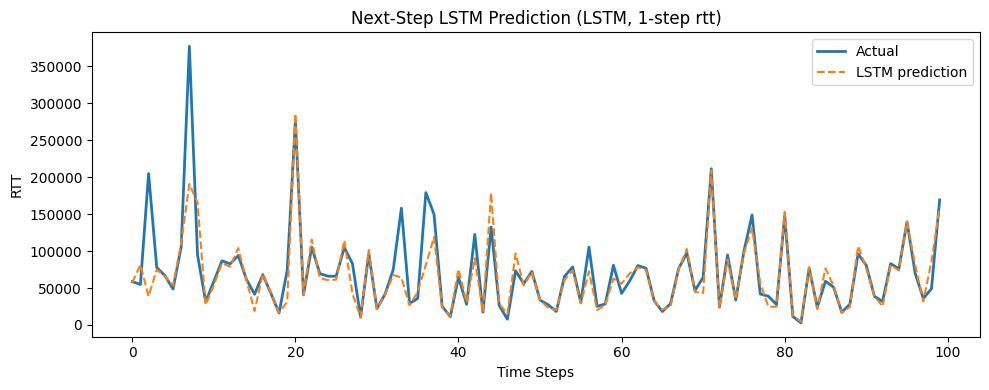

In [96]:
# Plot predictions vs actual values (we will plot only the first 200 rows)
plt.figure(figsize=(10,4))
plt.plot(y_true_lstm[:100], label='Actual', linewidth=2)
plt.plot(y_pred_lstm[:100], label='LSTM prediction', linestyle='--')
plt.title(f'Next-Step LSTM Prediction (LSTM, 1-step rtt)')
plt.xlabel('Time Steps')
plt.ylabel('RTT')
plt.legend()
plt.tight_layout()
plt.show()

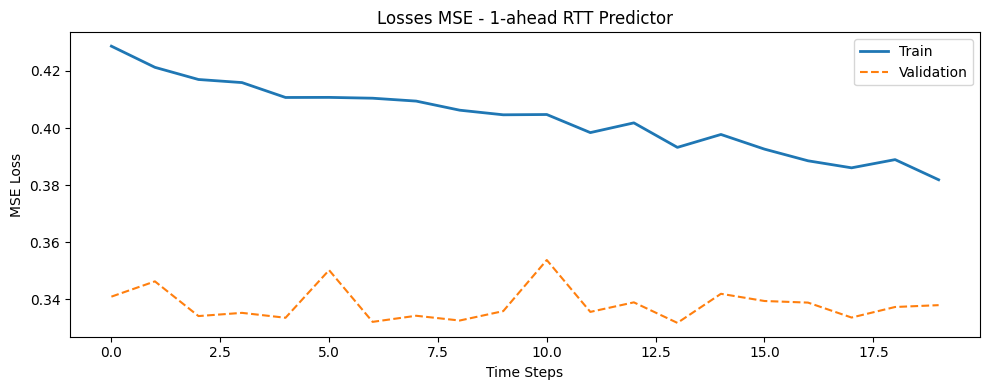

In [97]:
plt.figure(figsize=(10,4))
plt.plot(train_losses, label='Train', linewidth=2)
plt.plot(val_losses, label='Validation', linestyle='--')
plt.title(f'Losses MSE - 1-ahead RTT Predictor')
plt.xlabel('Time Steps')
plt.ylabel('MSE Loss')
plt.legend()
plt.tight_layout()
plt.show()

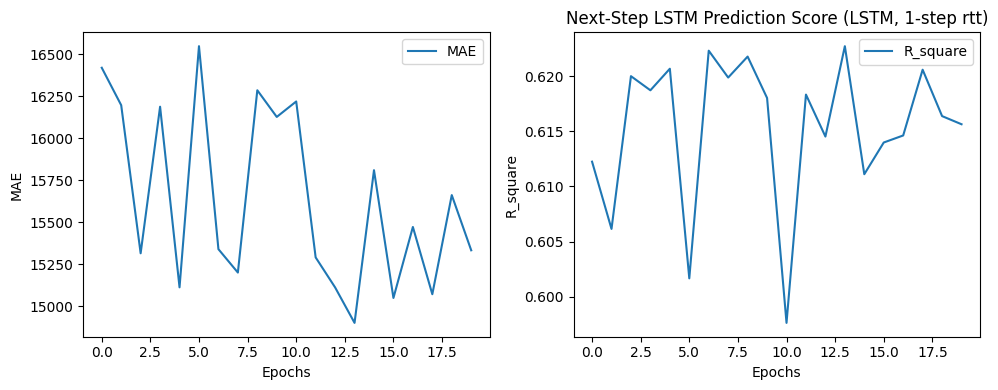

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(perf_mae, label='MAE')
ax[1].plot(perf_R2, label='R_square')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('MAE')
ax[1].set_ylabel('R_square')

ax[0].legend()
ax[1].legend()
plt.title(f'Next-Step LSTM Prediction Score (LSTM, 1-step rtt)')
plt.tight_layout()
plt.show()

**delivery_rate**

In [99]:
print("Preparing numeric dataset.")

# Keep only numeric columns (make sure session_id and time are still accessible)
df_numeric = df.select_dtypes(include=[np.number]).copy()
if 'session_id' in df.columns:
    df_numeric['session_id'] = df['session_id']
if 'time' in df.columns:
    df_numeric['time'] = df['time']

# Columns of interest (these are the most important and relevant columns, I recommend you also start from these)
feature_cols = ['cwnd', 'in_flight', 'min_rtt', 'rtt', 'delivery_rate', 'buffer']
feature_cols = [c for c in feature_cols if c in df_numeric.columns]

# Here, I am predicting the rtt of the next step. We are also looking to train models to predict other metrics (e.g., delivery_rate, cwnd, buffer)
# In addition, we also want to train models to predict rtt at different values in the future, such as 3 steps, 5 steps, 10 steps, etc
groups = df_numeric.groupby('session_id')

Preparing numeric dataset.


In [100]:
X_windows, y_windows = form_sliding_windows(groups, regression_target='delivery_rate_next', regress_based_on='delivery_rate', temporal_var='time', num_lag=1)

assert len(X_windows) == len(y_windows)
print(f"X_windows: num_windows = {X_windows.shape[0]}, window_length: {X_windows.shape[1]}, per_window_dim: {X_windows.shape[2]}")

# Could subsample here
m = 1000000
print(f"Training: num_windows = {m} with feature_dim = {X_windows.shape[2]}")
idx = np.random.choice(len(X_windows), size=m, replace=False)
X_train, X_val, y_train, y_val = train_test_split(X_windows[idx], y_windows[idx], test_size=0.2, shuffle=False, random_state=42)

# Preprocessing:
train_flat = X_train.reshape(-1, X_train.shape[-1])
scaler = StandardScaler().fit(train_flat)

# transform by reshaping, transforming, reshaping back
def scale_windows(X, scaler):
    orig_shape = X.shape
    flat = X.reshape(-1, orig_shape[-1])
    flat_t = scaler.transform(flat)
    return flat_t.reshape(orig_shape)

# Scale X (input windows)
X_train_scaled = scale_windows(X_train, scaler)
X_val_scaled = scale_windows(X_val, scaler)

# Scale y (target delivery_rate values) - use the RTT scaling factor from our scaler
d_idx = feature_cols.index('delivery_rate')
d_mean = scaler.mean_[d_idx]
d_scale = scaler.scale_[d_idx]

# Manual scaling using RTT parameters
y_train_scaled = (y_train - d_mean) / d_scale
y_val_scaled = (y_val - d_mean) / d_scale

X_windows: num_windows = 5706536, window_length: 30, per_window_dim: 6
Training: num_windows = 1000000 with feature_dim = 6


In [101]:
model = LSTM_regressor(in_d = X_train.shape[2], hidden_d=HIDDEN_DIM, out_d=1, 
                       num_layers=NUM_LAYERS, bidirectional=False, dropout=0.2)
model.to(DEVICE)
objective = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)
train_ds = TensorDataset(torch.from_numpy(X_train_scaled.astype(np.float32)), torch.from_numpy(y_train_scaled.astype(np.float32)))
val_ds = TensorDataset(torch.from_numpy(X_val_scaled.astype(np.float32)), torch.from_numpy(y_val_scaled.astype(np.float32)))
train_losses = []
val_losses = []
perf_mae = []
perf_R2 = []
for epoch in range(EPOCHS):
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)   
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(DEVICE)
        y_batch = y_batch.to(DEVICE)
        
        optimizer.zero_grad()
        y_pred = model(x_batch).squeeze(-1)
        loss = objective(y_pred, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 10.0)
        optimizer.step()
        
        total_loss += loss.item() * x_batch.size(0)
    avg_train = total_loss / len(train_loader.dataset)
    train_losses.append(avg_train)
    
    model.eval()
    val_loss = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for x_val_batch, y_val_batch in val_loader:
            x_val_batch = x_val_batch.to(DEVICE)
            y_val_batch = y_val_batch.to(DEVICE)
            val_preds = model(x_val_batch).squeeze(-1)
            loss = objective(val_preds, y_val_batch)
            val_loss += loss.item() * x_val_batch.size(0)
            
            # Store predictions and true values (scaled)
            y_pred.append(val_preds.cpu().numpy())
            y_true.append(y_val_batch.cpu().numpy())
        
    # Concatenate predictions and true values (still scaled)
    y_pred_scaled = np.concatenate(y_pred, axis=0)
    y_true_scaled = np.concatenate(y_true, axis=0)
    
    # Manual inverse transform using RTT parameters
    y_pred_lstm = y_pred_scaled * rtt_scale + rtt_mean
    y_true_lstm = y_true_scaled * rtt_scale + rtt_mean

    mae_lstm = mean_absolute_error(y_true_lstm, y_pred_lstm)
    r2_lstm = r2_score(y_true_lstm, y_pred_lstm)
    perf_mae.append(mae_lstm)
    perf_R2.append(r2_lstm)
    print(f"LSTM MAE: {mae_lstm:.6f}, R^2: {r2_lstm:.6f}")
    print(f"y_true: {y_true_lstm[:5]}, y_pred: {y_pred_lstm[:5]}")
    avg_val = val_loss / len(val_loader.dataset)
    val_losses.append(avg_val)
    print(f" Epoch {epoch:02d} | Train MSE: {avg_train:.6f} | Val MSE: {avg_val:.6f}", '\n')

LSTM MAE: 19088.232422, R^2: 0.752583
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 50366.945 380503.1    60765.023 101192.64   65666.48 ]
 Epoch 00 | Train MSE: 0.322823 | Val MSE: 0.247461 

LSTM MAE: 18803.759766, R^2: 0.779692
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 33823.953 356547.72   44390.965 104628.4    57502.24 ]
 Epoch 01 | Train MSE: 0.246919 | Val MSE: 0.220347 

LSTM MAE: 17472.707031, R^2: 0.781305
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 37692.355 451046.66   48111.555  98316.03   64517.85 ]
 Epoch 02 | Train MSE: 0.233014 | Val MSE: 0.218733 

LSTM MAE: 18011.482422, R^2: 0.786344
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 33637.96  505234.53   43878.016  95129.91   57600.625]
 Epoch 03 | Train MSE: 0.224941 | Val MSE: 0.213694 

LSTM MAE: 16982.369141, R^2: 0.790242
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pr

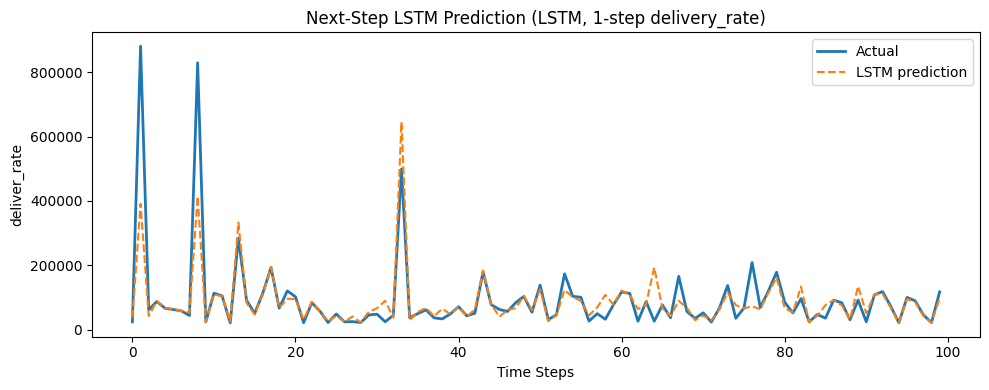

In [102]:
# Plot predictions vs actual values (we will plot only the first 200 rows)
plt.figure(figsize=(10,4))
plt.plot(y_true_lstm[:100], label='Actual', linewidth=2)
plt.plot(y_pred_lstm[:100], label='LSTM prediction', linestyle='--')
plt.title(f'Next-Step LSTM Prediction (LSTM, 1-step delivery_rate)')
plt.xlabel('Time Steps')
plt.ylabel('deliver_rate')
plt.legend()
plt.tight_layout()
plt.show()

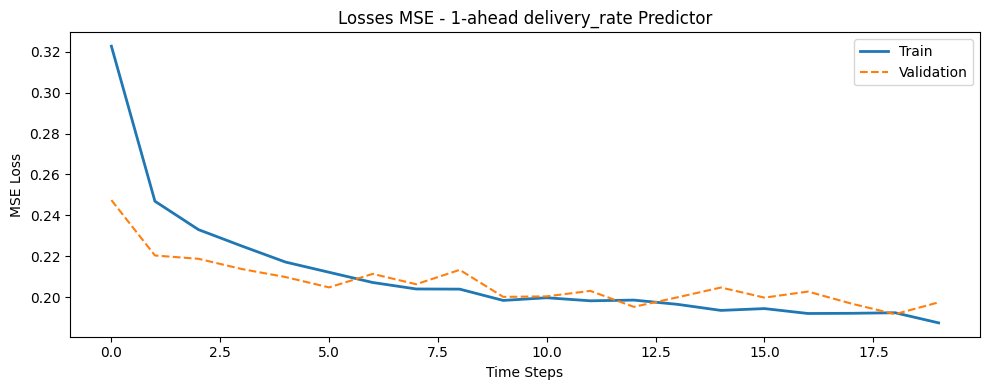

In [103]:
plt.figure(figsize=(10,4))
plt.plot(train_losses, label='Train', linewidth=2)
plt.plot(val_losses, label='Validation', linestyle='--')
plt.title(f'Losses MSE - 1-ahead delivery_rate Predictor')
plt.xlabel('Time Steps')
plt.ylabel('MSE Loss')
plt.legend()
plt.tight_layout()
plt.show()

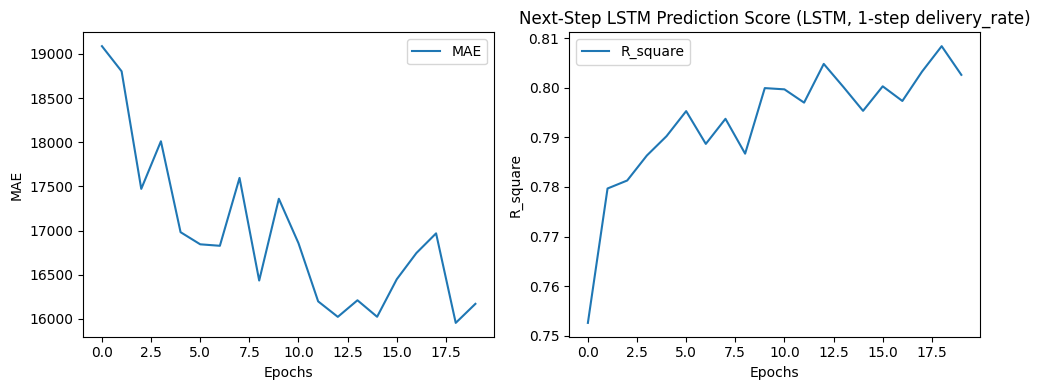

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(perf_mae, label='MAE')
ax[1].plot(perf_R2, label='R_square')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('MAE')
ax[1].set_ylabel('R_square')

ax[0].legend()
ax[1].legend()
plt.title(f'Next-Step LSTM Prediction Score (LSTM, 1-step delivery_rate)')
plt.tight_layout()
plt.show()

# 2-ahead predictor

In [ ]:
X_windows, y_windows = form_sliding_windows(groups, regression_target='rtt_next', regress_based_on='rtt', temporal_var='time', num_lag=2)

assert len(X_windows) == len(y_windows)
print(f"X_windows: num_windows = {X_windows.shape[0]}, window_length: {X_windows.shape[1]}, per_window_dim: {X_windows.shape[2]}")

# Could subsample here
m = 1000000
print(f"Training: num_windows = {m} with feature_dim = {X_windows.shape[2]}")
idx = np.random.choice(len(X_windows), size=m, replace=False)
X_train, X_val, y_train, y_val = train_test_split(X_windows[idx], y_windows[idx], test_size=0.2, shuffle=False, random_state=42)

# Preprocessing:
train_flat = X_train.reshape(-1, X_train.shape[-1])
scaler = StandardScaler().fit(train_flat)

# transform by reshaping, transforming, reshaping back
def scale_windows(X, scaler):
    orig_shape = X.shape
    flat = X.reshape(-1, orig_shape[-1])
    flat_t = scaler.transform(flat)
    return flat_t.reshape(orig_shape)

# Scale X (input windows)
X_train_scaled = scale_windows(X_train, scaler)
X_val_scaled = scale_windows(X_val, scaler)

# Scale y (target RTT values) - use the RTT scaling factor from our scaler
rtt_idx = feature_cols.index('rtt')
rtt_mean = scaler.mean_[rtt_idx]
rtt_scale = scaler.scale_[rtt_idx]

# Manual scaling using RTT parameters
y_train_scaled = (y_train - rtt_mean) / rtt_scale
y_val_scaled = (y_val - rtt_mean) / rtt_scale

X_windows: num_windows = 5706536, window_length: 30, per_window_dim: 6
Training: num_windows = 1000000 with feature_dim = 6


**RTT**

In [ ]:
model = LSTM_regressor(in_d = X_train.shape[2], hidden_d=HIDDEN_DIM, out_d=1, 
                       num_layers=NUM_LAYERS, bidirectional=False, dropout=0.2)
model.to(DEVICE)
objective = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)
train_ds = TensorDataset(torch.from_numpy(X_train_scaled.astype(np.float32)), torch.from_numpy(y_train_scaled.astype(np.float32)))
val_ds = TensorDataset(torch.from_numpy(X_val_scaled.astype(np.float32)), torch.from_numpy(y_val_scaled.astype(np.float32)))
train_losses = []
val_losses = []
perf_mae = []
perf_R2 = []
for epoch in range(EPOCHS):
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)   
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(DEVICE)
        y_batch = y_batch.to(DEVICE)
        
        optimizer.zero_grad()
        y_pred = model(x_batch).squeeze(-1)
        loss = objective(y_pred, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 10.0)
        optimizer.step()
        
        total_loss += loss.item() * x_batch.size(0)
    avg_train = total_loss / len(train_loader.dataset)
    train_losses.append(avg_train)
    
    model.eval()
    val_loss = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for x_val_batch, y_val_batch in val_loader:
            x_val_batch = x_val_batch.to(DEVICE)
            y_val_batch = y_val_batch.to(DEVICE)
            val_preds = model(x_val_batch).squeeze(-1)
            loss = objective(val_preds, y_val_batch)
            val_loss += loss.item() * x_val_batch.size(0)
            
            # Store predictions and true values (scaled)
            y_pred.append(val_preds.cpu().numpy())
            y_true.append(y_val_batch.cpu().numpy())
        
    # Concatenate predictions and true values (still scaled)
    y_pred_scaled = np.concatenate(y_pred, axis=0)
    y_true_scaled = np.concatenate(y_true, axis=0)
    
    # Manual inverse transform using RTT parameters
    y_pred_lstm = y_pred_scaled * rtt_scale + rtt_mean
    y_true_lstm = y_true_scaled * rtt_scale + rtt_mean

    mae_lstm = mean_absolute_error(y_true_lstm, y_pred_lstm)
    r2_lstm = r2_score(y_true_lstm, y_pred_lstm)
    perf_mae.append(mae_lstm)
    perf_R2.append(r2_lstm)
    print(f"LSTM MAE: {mae_lstm:.6f}, R^2: {r2_lstm:.6f}")
    print(f"y_true: {y_true_lstm[:5]}, y_pred: {y_pred_lstm[:5]}")
    avg_val = val_loss / len(val_loader.dataset)
    val_losses.append(avg_val)
    print(f" Epoch {epoch:02d} | Train MSE: {avg_train:.6f} | Val MSE: {avg_val:.6f}", '\n')

LSTM MAE: 16420.421875, R^2: 0.612244
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [60877.273 83501.3   41922.492 83400.805 71446.61 ]
 Epoch 00 | Train MSE: 0.428707 | Val MSE: 0.340855 

LSTM MAE: 16197.486328, R^2: 0.606149
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [57355.79  78796.34  41671.836 75996.83  65832.74 ]
 Epoch 01 | Train MSE: 0.421285 | Val MSE: 0.346212 

LSTM MAE: 15315.733398, R^2: 0.619995
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [59934.52  83684.69  38577.547 81494.164 69718.234]
 Epoch 02 | Train MSE: 0.417019 | Val MSE: 0.334041 

LSTM MAE: 16188.465820, R^2: 0.618713
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [60714.055 86560.75  39738.37  83047.516 71145.44 ]
 Epoch 03 | Train MSE: 0.415935 | Val MSE: 0.335168 

LSTM MAE: 15112.998047, R^2: 0.620669
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [57377.    82880.58  37877.99  78147.7   67067.375]
 Epoch 04 | Train MSE: 0.410712 | Val M

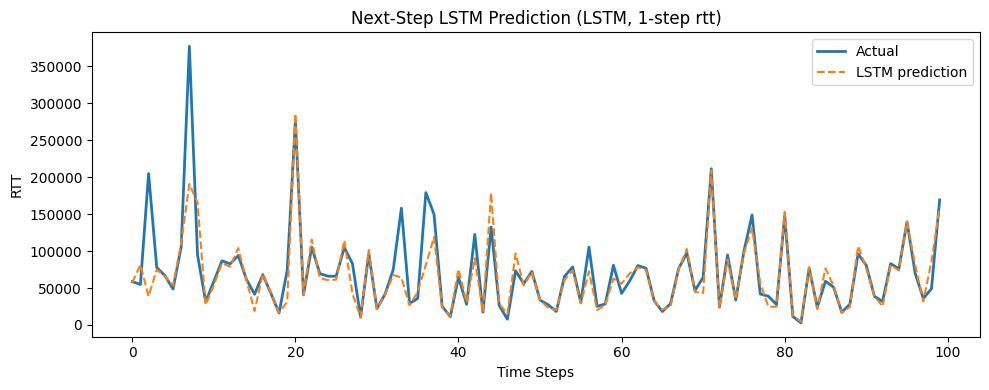

In [ ]:
# Plot predictions vs actual values (we will plot only the first 200 rows)
plt.figure(figsize=(10,4))
plt.plot(y_true_lstm[:100], label='Actual', linewidth=2)
plt.plot(y_pred_lstm[:100], label='LSTM prediction', linestyle='--')
plt.title(f'Next-Step LSTM Prediction (LSTM, 2-step rtt)')
plt.xlabel('Time Steps')
plt.ylabel('RTT')
plt.legend()
plt.tight_layout()
plt.show()

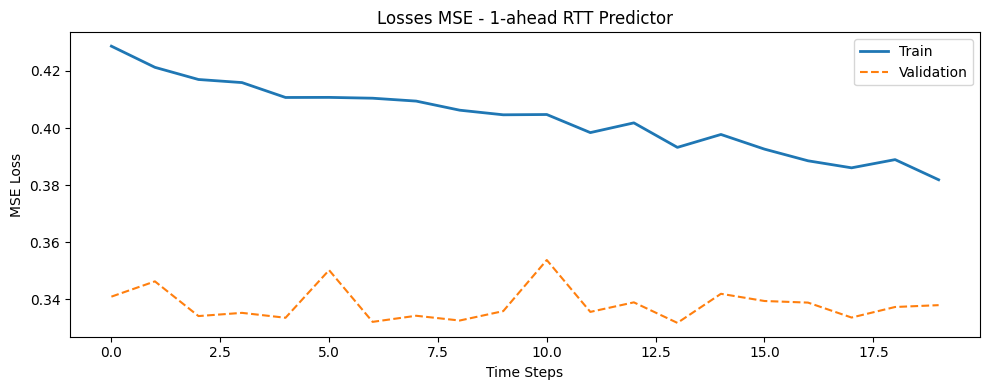

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train_losses, label='Train', linewidth=2)
plt.plot(val_losses, label='Validation', linestyle='--')
plt.title(f'Losses MSE - 2-ahead RTT Predictor')
plt.xlabel('Time Steps')
plt.ylabel('MSE Loss')
plt.legend()
plt.tight_layout()
plt.show()

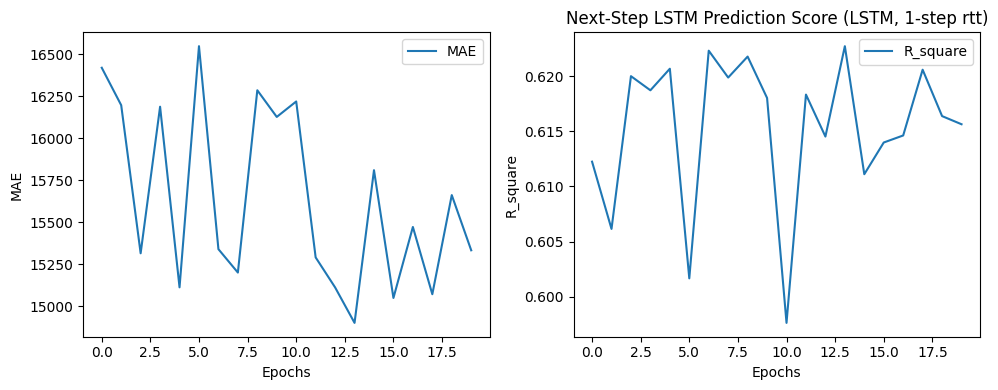

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(perf_mae, label='MAE')
ax[1].plot(perf_R2, label='R_square')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('MAE')
ax[1].set_ylabel('R_square')

ax[0].legend()
ax[1].legend()
plt.title(f'Next-Step LSTM Prediction Score (LSTM, 2-step rtt)')
plt.tight_layout()
plt.show()

**delivery_rate**

In [ ]:
print("Preparing numeric dataset.")

# Keep only numeric columns (make sure session_id and time are still accessible)
df_numeric = df.select_dtypes(include=[np.number]).copy()
if 'session_id' in df.columns:
    df_numeric['session_id'] = df['session_id']
if 'time' in df.columns:
    df_numeric['time'] = df['time']

# Columns of interest (these are the most important and relevant columns, I recommend you also start from these)
feature_cols = ['cwnd', 'in_flight', 'min_rtt', 'rtt', 'delivery_rate', 'buffer']
feature_cols = [c for c in feature_cols if c in df_numeric.columns]

# Here, I am predicting the rtt of the next step. We are also looking to train models to predict other metrics (e.g., delivery_rate, cwnd, buffer)
# In addition, we also want to train models to predict rtt at different values in the future, such as 3 steps, 5 steps, 10 steps, etc
groups = df_numeric.groupby('session_id')

Preparing numeric dataset.


In [ ]:
X_windows, y_windows = form_sliding_windows(groups, regression_target='delivery_rate_next', regress_based_on='delivery_rate', temporal_var='time', num_lag=2)

assert len(X_windows) == len(y_windows)
print(f"X_windows: num_windows = {X_windows.shape[0]}, window_length: {X_windows.shape[1]}, per_window_dim: {X_windows.shape[2]}")

# Could subsample here
m = 1000000
print(f"Training: num_windows = {m} with feature_dim = {X_windows.shape[2]}")
idx = np.random.choice(len(X_windows), size=m, replace=False)
X_train, X_val, y_train, y_val = train_test_split(X_windows[idx], y_windows[idx], test_size=0.2, shuffle=False, random_state=42)

# Preprocessing:
train_flat = X_train.reshape(-1, X_train.shape[-1])
scaler = StandardScaler().fit(train_flat)

# transform by reshaping, transforming, reshaping back
def scale_windows(X, scaler):
    orig_shape = X.shape
    flat = X.reshape(-1, orig_shape[-1])
    flat_t = scaler.transform(flat)
    return flat_t.reshape(orig_shape)

# Scale X (input windows)
X_train_scaled = scale_windows(X_train, scaler)
X_val_scaled = scale_windows(X_val, scaler)

# Scale y (target delivery_rate values) - use the RTT scaling factor from our scaler
d_idx = feature_cols.index('delivery_rate')
d_mean = scaler.mean_[d_idx]
d_scale = scaler.scale_[d_idx]

# Manual scaling using RTT parameters
y_train_scaled = (y_train - d_mean) / d_scale
y_val_scaled = (y_val - d_mean) / d_scale

X_windows: num_windows = 5706536, window_length: 30, per_window_dim: 6
Training: num_windows = 1000000 with feature_dim = 6


In [ ]:
model = LSTM_regressor(in_d = X_train.shape[2], hidden_d=HIDDEN_DIM, out_d=1, 
                       num_layers=NUM_LAYERS, bidirectional=False, dropout=0.2)
model.to(DEVICE)
objective = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)
train_ds = TensorDataset(torch.from_numpy(X_train_scaled.astype(np.float32)), torch.from_numpy(y_train_scaled.astype(np.float32)))
val_ds = TensorDataset(torch.from_numpy(X_val_scaled.astype(np.float32)), torch.from_numpy(y_val_scaled.astype(np.float32)))
train_losses = []
val_losses = []
perf_mae = []
perf_R2 = []
for epoch in range(EPOCHS):
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)   
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(DEVICE)
        y_batch = y_batch.to(DEVICE)
        
        optimizer.zero_grad()
        y_pred = model(x_batch).squeeze(-1)
        loss = objective(y_pred, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 10.0)
        optimizer.step()
        
        total_loss += loss.item() * x_batch.size(0)
    avg_train = total_loss / len(train_loader.dataset)
    train_losses.append(avg_train)
    
    model.eval()
    val_loss = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for x_val_batch, y_val_batch in val_loader:
            x_val_batch = x_val_batch.to(DEVICE)
            y_val_batch = y_val_batch.to(DEVICE)
            val_preds = model(x_val_batch).squeeze(-1)
            loss = objective(val_preds, y_val_batch)
            val_loss += loss.item() * x_val_batch.size(0)
            
            # Store predictions and true values (scaled)
            y_pred.append(val_preds.cpu().numpy())
            y_true.append(y_val_batch.cpu().numpy())
        
    # Concatenate predictions and true values (still scaled)
    y_pred_scaled = np.concatenate(y_pred, axis=0)
    y_true_scaled = np.concatenate(y_true, axis=0)
    
    # Manual inverse transform using RTT parameters
    y_pred_lstm = y_pred_scaled * rtt_scale + rtt_mean
    y_true_lstm = y_true_scaled * rtt_scale + rtt_mean

    mae_lstm = mean_absolute_error(y_true_lstm, y_pred_lstm)
    r2_lstm = r2_score(y_true_lstm, y_pred_lstm)
    perf_mae.append(mae_lstm)
    perf_R2.append(r2_lstm)
    print(f"LSTM MAE: {mae_lstm:.6f}, R^2: {r2_lstm:.6f}")
    print(f"y_true: {y_true_lstm[:5]}, y_pred: {y_pred_lstm[:5]}")
    avg_val = val_loss / len(val_loader.dataset)
    val_losses.append(avg_val)
    print(f" Epoch {epoch:02d} | Train MSE: {avg_train:.6f} | Val MSE: {avg_val:.6f}", '\n')

LSTM MAE: 19088.232422, R^2: 0.752583
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 50366.945 380503.1    60765.023 101192.64   65666.48 ]
 Epoch 00 | Train MSE: 0.322823 | Val MSE: 0.247461 

LSTM MAE: 18803.759766, R^2: 0.779692
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 33823.953 356547.72   44390.965 104628.4    57502.24 ]
 Epoch 01 | Train MSE: 0.246919 | Val MSE: 0.220347 

LSTM MAE: 17472.707031, R^2: 0.781305
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 37692.355 451046.66   48111.555  98316.03   64517.85 ]
 Epoch 02 | Train MSE: 0.233014 | Val MSE: 0.218733 

LSTM MAE: 18011.482422, R^2: 0.786344
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 33637.96  505234.53   43878.016  95129.91   57600.625]
 Epoch 03 | Train MSE: 0.224941 | Val MSE: 0.213694 

LSTM MAE: 16982.369141, R^2: 0.790242
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pr

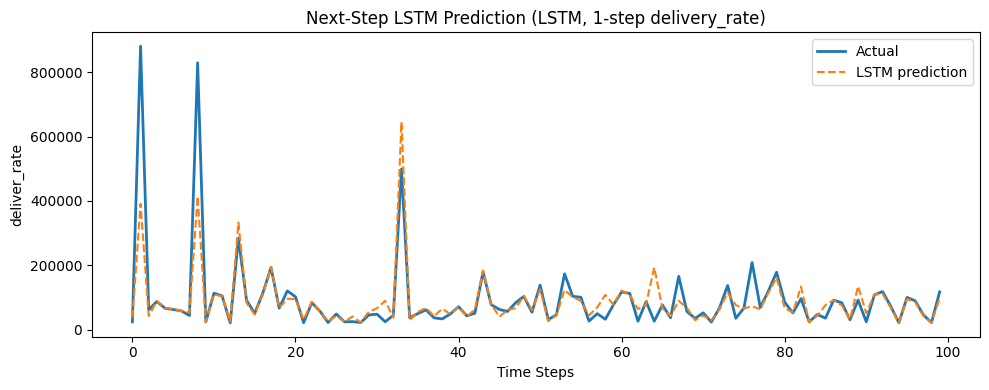

In [ ]:
# Plot predictions vs actual values (we will plot only the first 200 rows)
plt.figure(figsize=(10,4))
plt.plot(y_true_lstm[:100], label='Actual', linewidth=2)
plt.plot(y_pred_lstm[:100], label='LSTM prediction', linestyle='--')
plt.title(f'Next-Step LSTM Prediction (LSTM, 2-step delivery_rate)')
plt.xlabel('Time Steps')
plt.ylabel('deliver_rate')
plt.legend()
plt.tight_layout()
plt.show()

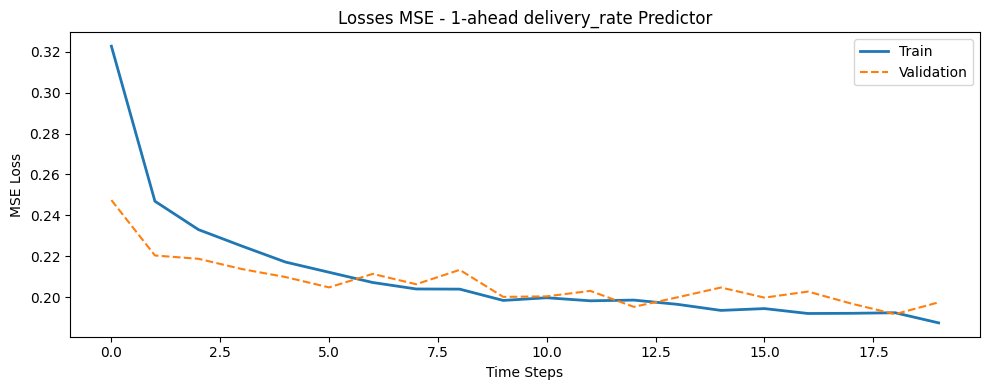

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train_losses, label='Train', linewidth=2)
plt.plot(val_losses, label='Validation', linestyle='--')
plt.title(f'Losses MSE - 2-ahead delivery_rate Predictor')
plt.xlabel('Time Steps')
plt.ylabel('MSE Loss')
plt.legend()
plt.tight_layout()
plt.show()

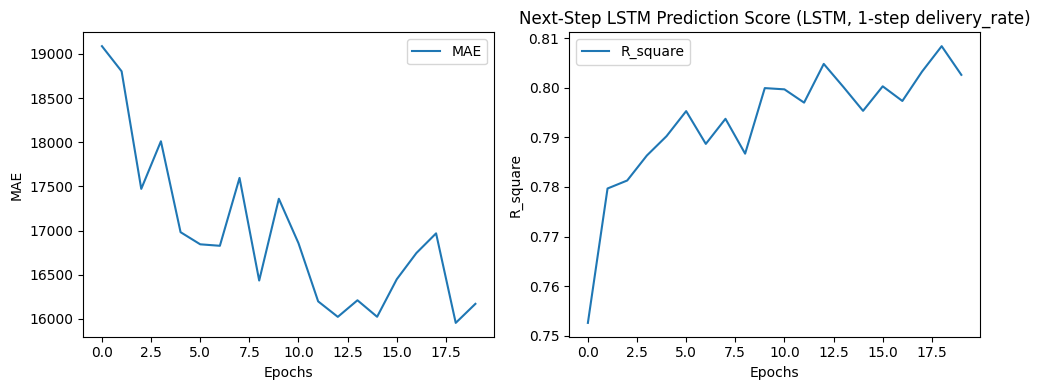

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(perf_mae, label='MAE')
ax[1].plot(perf_R2, label='R_square')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('MAE')
ax[1].set_ylabel('R_square')

ax[0].legend()
ax[1].legend()

plt.title(f'Next-Step LSTM Prediction Score (LSTM, 2-step delivery_rate)')
plt.tight_layout()
plt.show()

# 3-step ahead

In [ ]:
X_windows, y_windows = form_sliding_windows(groups, regression_target='rtt_next', regress_based_on='rtt', temporal_var='time', num_lag=3)

assert len(X_windows) == len(y_windows)
print(f"X_windows: num_windows = {X_windows.shape[0]}, window_length: {X_windows.shape[1]}, per_window_dim: {X_windows.shape[2]}")

# Could subsample here
m = 1000000
print(f"Training: num_windows = {m} with feature_dim = {X_windows.shape[2]}")
idx = np.random.choice(len(X_windows), size=m, replace=False)
X_train, X_val, y_train, y_val = train_test_split(X_windows[idx], y_windows[idx], test_size=0.2, shuffle=False, random_state=42)

# Preprocessing:
train_flat = X_train.reshape(-1, X_train.shape[-1])
scaler = StandardScaler().fit(train_flat)

# transform by reshaping, transforming, reshaping back
def scale_windows(X, scaler):
    orig_shape = X.shape
    flat = X.reshape(-1, orig_shape[-1])
    flat_t = scaler.transform(flat)
    return flat_t.reshape(orig_shape)

# Scale X (input windows)
X_train_scaled = scale_windows(X_train, scaler)
X_val_scaled = scale_windows(X_val, scaler)

# Scale y (target RTT values) - use the RTT scaling factor from our scaler
rtt_idx = feature_cols.index('rtt')
rtt_mean = scaler.mean_[rtt_idx]
rtt_scale = scaler.scale_[rtt_idx]

# Manual scaling using RTT parameters
y_train_scaled = (y_train - rtt_mean) / rtt_scale
y_val_scaled = (y_val - rtt_mean) / rtt_scale

X_windows: num_windows = 5706536, window_length: 30, per_window_dim: 6
Training: num_windows = 1000000 with feature_dim = 6


**RTT**

In [ ]:
model = LSTM_regressor(in_d = X_train.shape[2], hidden_d=HIDDEN_DIM, out_d=1, 
                       num_layers=NUM_LAYERS, bidirectional=False, dropout=0.2)
model.to(DEVICE)
objective = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)
train_ds = TensorDataset(torch.from_numpy(X_train_scaled.astype(np.float32)), torch.from_numpy(y_train_scaled.astype(np.float32)))
val_ds = TensorDataset(torch.from_numpy(X_val_scaled.astype(np.float32)), torch.from_numpy(y_val_scaled.astype(np.float32)))
train_losses = []
val_losses = []
perf_mae = []
perf_R2 = []
for epoch in range(EPOCHS):
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)   
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(DEVICE)
        y_batch = y_batch.to(DEVICE)
        
        optimizer.zero_grad()
        y_pred = model(x_batch).squeeze(-1)
        loss = objective(y_pred, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 10.0)
        optimizer.step()
        
        total_loss += loss.item() * x_batch.size(0)
    avg_train = total_loss / len(train_loader.dataset)
    train_losses.append(avg_train)
    
    model.eval()
    val_loss = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for x_val_batch, y_val_batch in val_loader:
            x_val_batch = x_val_batch.to(DEVICE)
            y_val_batch = y_val_batch.to(DEVICE)
            val_preds = model(x_val_batch).squeeze(-1)
            loss = objective(val_preds, y_val_batch)
            val_loss += loss.item() * x_val_batch.size(0)
            
            # Store predictions and true values (scaled)
            y_pred.append(val_preds.cpu().numpy())
            y_true.append(y_val_batch.cpu().numpy())
        
    # Concatenate predictions and true values (still scaled)
    y_pred_scaled = np.concatenate(y_pred, axis=0)
    y_true_scaled = np.concatenate(y_true, axis=0)
    
    # Manual inverse transform using RTT parameters
    y_pred_lstm = y_pred_scaled * rtt_scale + rtt_mean
    y_true_lstm = y_true_scaled * rtt_scale + rtt_mean

    mae_lstm = mean_absolute_error(y_true_lstm, y_pred_lstm)
    r2_lstm = r2_score(y_true_lstm, y_pred_lstm)
    perf_mae.append(mae_lstm)
    perf_R2.append(r2_lstm)
    print(f"LSTM MAE: {mae_lstm:.6f}, R^2: {r2_lstm:.6f}")
    print(f"y_true: {y_true_lstm[:5]}, y_pred: {y_pred_lstm[:5]}")
    avg_val = val_loss / len(val_loader.dataset)
    val_losses.append(avg_val)
    print(f" Epoch {epoch:02d} | Train MSE: {avg_train:.6f} | Val MSE: {avg_val:.6f}", '\n')

LSTM MAE: 16420.421875, R^2: 0.612244
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [60877.273 83501.3   41922.492 83400.805 71446.61 ]
 Epoch 00 | Train MSE: 0.428707 | Val MSE: 0.340855 

LSTM MAE: 16197.486328, R^2: 0.606149
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [57355.79  78796.34  41671.836 75996.83  65832.74 ]
 Epoch 01 | Train MSE: 0.421285 | Val MSE: 0.346212 

LSTM MAE: 15315.733398, R^2: 0.619995
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [59934.52  83684.69  38577.547 81494.164 69718.234]
 Epoch 02 | Train MSE: 0.417019 | Val MSE: 0.334041 

LSTM MAE: 16188.465820, R^2: 0.618713
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [60714.055 86560.75  39738.37  83047.516 71145.44 ]
 Epoch 03 | Train MSE: 0.415935 | Val MSE: 0.335168 

LSTM MAE: 15112.998047, R^2: 0.620669
y_true: [ 58531.  54783. 204705.  77773.  66723.], y_pred: [57377.    82880.58  37877.99  78147.7   67067.375]
 Epoch 04 | Train MSE: 0.410712 | Val M

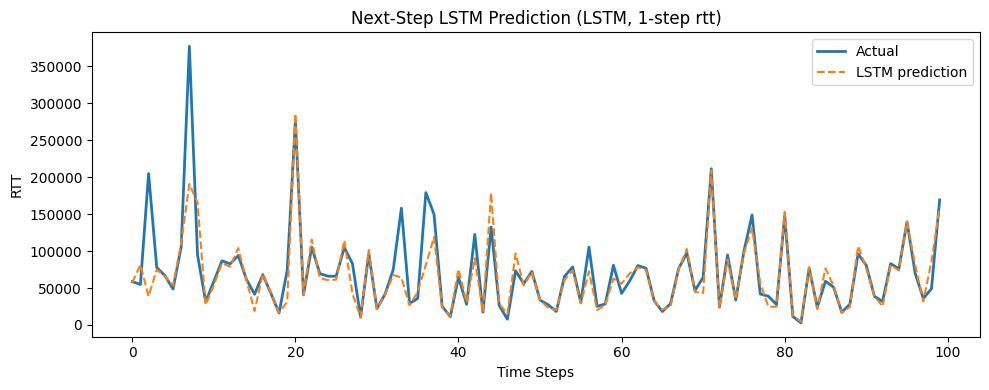

In [ ]:
# Plot predictions vs actual values (we will plot only the first 200 rows)
plt.figure(figsize=(10,4))
plt.plot(y_true_lstm[:100], label='Actual', linewidth=2)
plt.plot(y_pred_lstm[:100], label='LSTM prediction', linestyle='--')
plt.title(f'Next-Step LSTM Prediction (LSTM, 3-step rtt)')
plt.xlabel('Time Steps')
plt.ylabel('RTT')
plt.legend()
plt.tight_layout()
plt.show()

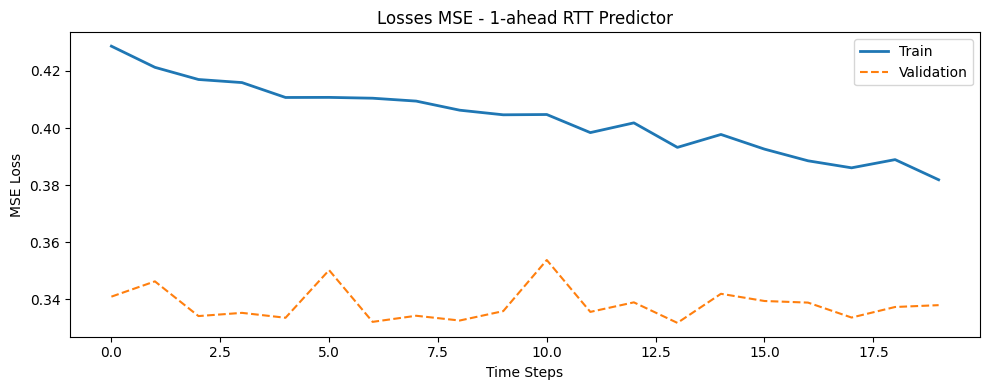

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train_losses, label='Train', linewidth=2)
plt.plot(val_losses, label='Validation', linestyle='--')
plt.title(f'Losses MSE - 3-ahead RTT Predictor')
plt.xlabel('Time Steps')
plt.ylabel('MSE Loss')
plt.legend()
plt.tight_layout()
plt.show()

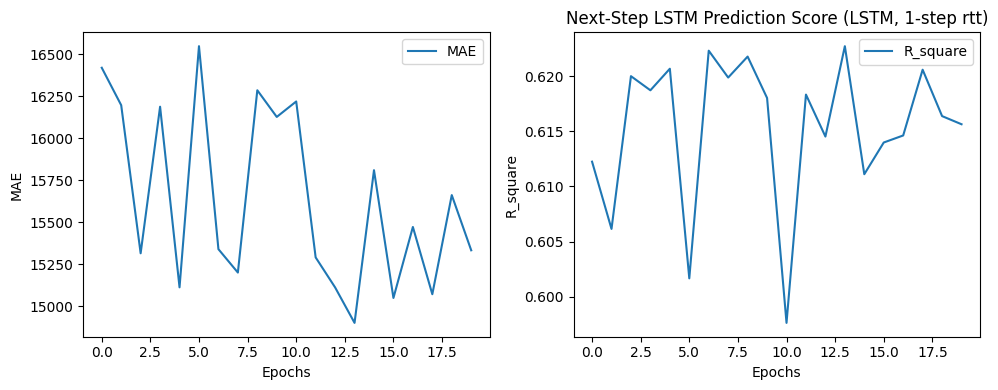

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(perf_mae, label='MAE')
ax[1].plot(perf_R2, label='R_square')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('MAE')
ax[1].set_ylabel('R_square')

ax[0].legend()
ax[1].legend()
plt.title(f'Next-Step LSTM Prediction Score (LSTM, 3-step rtt)')
plt.tight_layout()
plt.show()

**delivery_rate**

In [ ]:
print("Preparing numeric dataset.")

# Keep only numeric columns (make sure session_id and time are still accessible)
df_numeric = df.select_dtypes(include=[np.number]).copy()
if 'session_id' in df.columns:
    df_numeric['session_id'] = df['session_id']
if 'time' in df.columns:
    df_numeric['time'] = df['time']

# Columns of interest (these are the most important and relevant columns, I recommend you also start from these)
feature_cols = ['cwnd', 'in_flight', 'min_rtt', 'rtt', 'delivery_rate', 'buffer']
feature_cols = [c for c in feature_cols if c in df_numeric.columns]

# Here, I am predicting the rtt of the next step. We are also looking to train models to predict other metrics (e.g., delivery_rate, cwnd, buffer)
# In addition, we also want to train models to predict rtt at different values in the future, such as 3 steps, 5 steps, 10 steps, etc
groups = df_numeric.groupby('session_id')

Preparing numeric dataset.


In [ ]:
X_windows, y_windows = form_sliding_windows(groups, regression_target='delivery_rate_next', regress_based_on='delivery_rate', temporal_var='time', num_lag=3)

assert len(X_windows) == len(y_windows)
print(f"X_windows: num_windows = {X_windows.shape[0]}, window_length: {X_windows.shape[1]}, per_window_dim: {X_windows.shape[2]}")

# Could subsample here
m = 1000000
print(f"Training: num_windows = {m} with feature_dim = {X_windows.shape[2]}")
idx = np.random.choice(len(X_windows), size=m, replace=False)
X_train, X_val, y_train, y_val = train_test_split(X_windows[idx], y_windows[idx], test_size=0.2, shuffle=False, random_state=42)

# Preprocessing:
train_flat = X_train.reshape(-1, X_train.shape[-1])
scaler = StandardScaler().fit(train_flat)

# transform by reshaping, transforming, reshaping back
def scale_windows(X, scaler):
    orig_shape = X.shape
    flat = X.reshape(-1, orig_shape[-1])
    flat_t = scaler.transform(flat)
    return flat_t.reshape(orig_shape)

# Scale X (input windows)
X_train_scaled = scale_windows(X_train, scaler)
X_val_scaled = scale_windows(X_val, scaler)

# Scale y (target delivery_rate values) - use the RTT scaling factor from our scaler
d_idx = feature_cols.index('delivery_rate')
d_mean = scaler.mean_[d_idx]
d_scale = scaler.scale_[d_idx]

# Manual scaling using RTT parameters
y_train_scaled = (y_train - d_mean) / d_scale
y_val_scaled = (y_val - d_mean) / d_scale

X_windows: num_windows = 5706536, window_length: 30, per_window_dim: 6
Training: num_windows = 1000000 with feature_dim = 6


In [ ]:
model = LSTM_regressor(in_d = X_train.shape[2], hidden_d=HIDDEN_DIM, out_d=1, 
                       num_layers=NUM_LAYERS, bidirectional=False, dropout=0.2)
model.to(DEVICE)
objective = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)
train_ds = TensorDataset(torch.from_numpy(X_train_scaled.astype(np.float32)), torch.from_numpy(y_train_scaled.astype(np.float32)))
val_ds = TensorDataset(torch.from_numpy(X_val_scaled.astype(np.float32)), torch.from_numpy(y_val_scaled.astype(np.float32)))
train_losses = []
val_losses = []
perf_mae = []
perf_R2 = []
for epoch in range(EPOCHS):
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)   
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(DEVICE)
        y_batch = y_batch.to(DEVICE)
        
        optimizer.zero_grad()
        y_pred = model(x_batch).squeeze(-1)
        loss = objective(y_pred, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 10.0)
        optimizer.step()
        
        total_loss += loss.item() * x_batch.size(0)
    avg_train = total_loss / len(train_loader.dataset)
    train_losses.append(avg_train)
    
    model.eval()
    val_loss = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for x_val_batch, y_val_batch in val_loader:
            x_val_batch = x_val_batch.to(DEVICE)
            y_val_batch = y_val_batch.to(DEVICE)
            val_preds = model(x_val_batch).squeeze(-1)
            loss = objective(val_preds, y_val_batch)
            val_loss += loss.item() * x_val_batch.size(0)
            
            # Store predictions and true values (scaled)
            y_pred.append(val_preds.cpu().numpy())
            y_true.append(y_val_batch.cpu().numpy())
        
    # Concatenate predictions and true values (still scaled)
    y_pred_scaled = np.concatenate(y_pred, axis=0)
    y_true_scaled = np.concatenate(y_true, axis=0)
    
    # Manual inverse transform using RTT parameters
    y_pred_lstm = y_pred_scaled * rtt_scale + rtt_mean
    y_true_lstm = y_true_scaled * rtt_scale + rtt_mean

    mae_lstm = mean_absolute_error(y_true_lstm, y_pred_lstm)
    r2_lstm = r2_score(y_true_lstm, y_pred_lstm)
    perf_mae.append(mae_lstm)
    perf_R2.append(r2_lstm)
    print(f"LSTM MAE: {mae_lstm:.6f}, R^2: {r2_lstm:.6f}")
    print(f"y_true: {y_true_lstm[:5]}, y_pred: {y_pred_lstm[:5]}")
    avg_val = val_loss / len(val_loader.dataset)
    val_losses.append(avg_val)
    print(f" Epoch {epoch:02d} | Train MSE: {avg_train:.6f} | Val MSE: {avg_val:.6f}", '\n')

LSTM MAE: 19088.232422, R^2: 0.752583
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 50366.945 380503.1    60765.023 101192.64   65666.48 ]
 Epoch 00 | Train MSE: 0.322823 | Val MSE: 0.247461 

LSTM MAE: 18803.759766, R^2: 0.779692
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 33823.953 356547.72   44390.965 104628.4    57502.24 ]
 Epoch 01 | Train MSE: 0.246919 | Val MSE: 0.220347 

LSTM MAE: 17472.707031, R^2: 0.781305
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 37692.355 451046.66   48111.555  98316.03   64517.85 ]
 Epoch 02 | Train MSE: 0.233014 | Val MSE: 0.218733 

LSTM MAE: 18011.482422, R^2: 0.786344
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pred: [ 33637.96  505234.53   43878.016  95129.91   57600.625]
 Epoch 03 | Train MSE: 0.224941 | Val MSE: 0.213694 

LSTM MAE: 16982.369141, R^2: 0.790242
y_true: [ 24543.094 880893.06   62136.066  87844.07   66822.99 ], y_pr

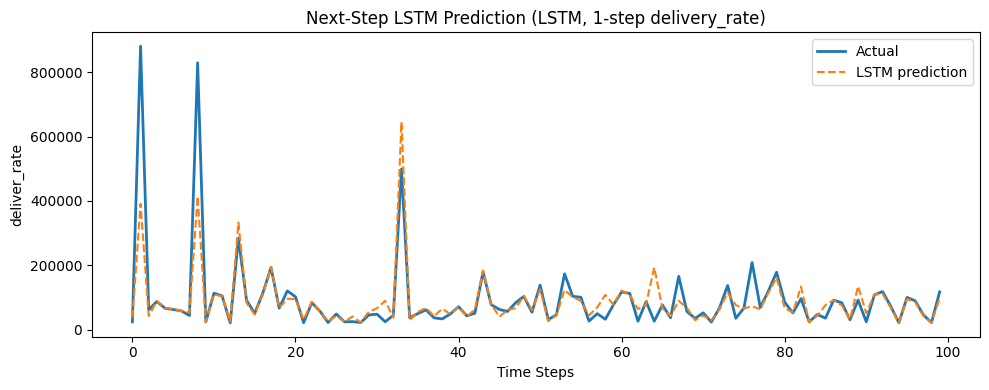

In [ ]:
# Plot predictions vs actual values (we will plot only the first 200 rows)
plt.figure(figsize=(10,4))
plt.plot(y_true_lstm[:100], label='Actual', linewidth=2)
plt.plot(y_pred_lstm[:100], label='LSTM prediction', linestyle='--')
plt.title(f'Next-Step LSTM Prediction (LSTM, 3-step delivery_rate)')
plt.xlabel('Time Steps')
plt.ylabel('deliver_rate')
plt.legend()
plt.tight_layout()
plt.show()

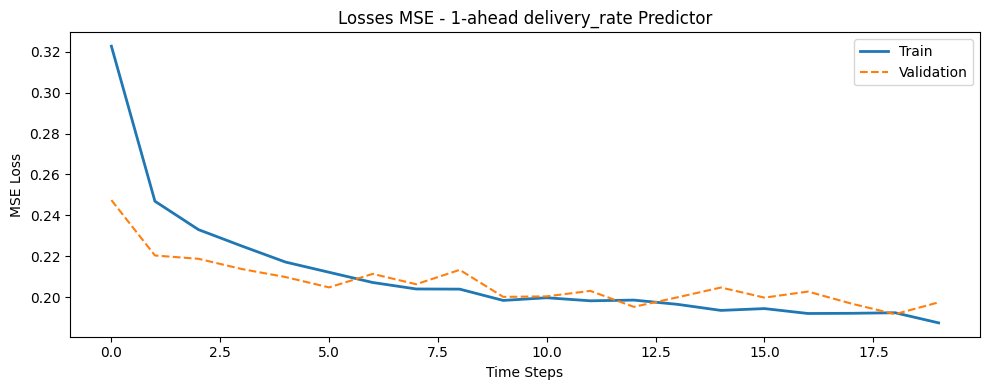

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train_losses, label='Train', linewidth=2)
plt.plot(val_losses, label='Validation', linestyle='--')
plt.title(f'Losses MSE - 3-ahead delivery_rate Predictor')
plt.xlabel('Time Steps')
plt.ylabel('MSE Loss')
plt.legend()
plt.tight_layout()
plt.show()

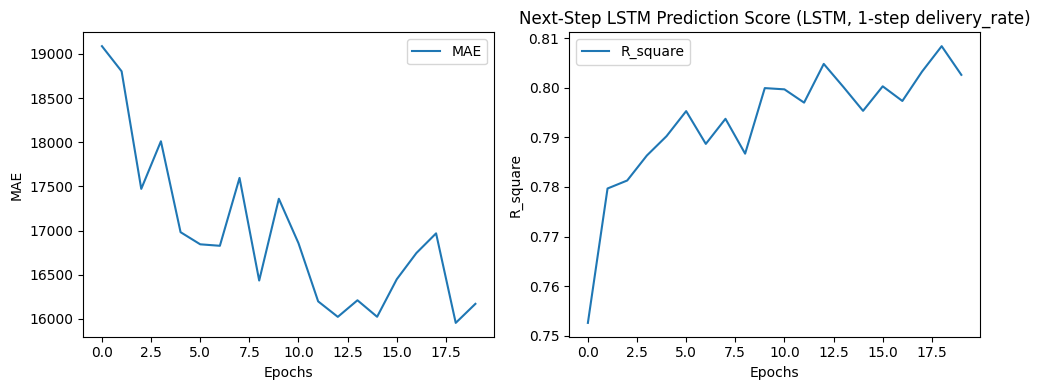

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(perf_mae, label='MAE')
ax[1].plot(perf_R2, label='R_square')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('MAE')
ax[1].set_ylabel('R_square')

ax[0].legend()
ax[1].legend()
plt.title(f'Next-Step LSTM Prediction Score (LSTM, 3-step delivery_rate)')

plt.tight_layout()
plt.show()